In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [2]:
batch_size = 128
epochs = 80
num_classes = 10

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


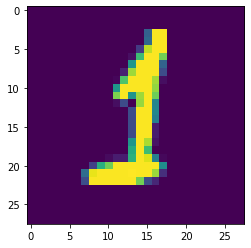

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
imgplot = plt.imshow(x_train[552,:,:])

In [5]:
xts = x_train.shape
xtes = x_test.shape
print(xts)

(60000, 28, 28)


In [6]:
x_train = x_train.reshape(xts[0], (xts[1]*xts[2]))
x_train = x_train.astype('float32')
x_test = x_test.reshape(xtes[0], (xtes[1]*xtes[2]))
x_test = x_test.astype('float32')
x_train = (x_train/255)-0.5
x_test = (x_test/255)-0.5

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (xts[1]*xts[2],)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


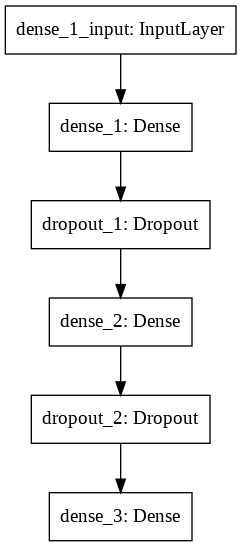

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [9]:
# !pip3 install ann_visualizer
# !pip install graphviz
# !pip install h5py

In [10]:
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, title="Artificial Neural network - Model Visualization")

In [11]:
h = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 3s 56us/step - loss: 1.1467 - accuracy: 0.6743 - val_loss: 0.5180 - val_accuracy: 0.8672
Epoch 2/80
60000/60000 [==============================] - 2s 27us/step - loss: 0.5374 - accuracy: 0.8429 - val_loss: 0.3784 - val_accuracy: 0.8938
Epoch 3/80
60000/60000 [==============================] - 2s 26us/step - loss: 0.4301 - accuracy: 0.8745 - val_loss: 0.3289 - val_accuracy: 0.9043
Epoch 4/80
60000/60000 [==============================] - 2s 27us/step - loss: 0.3823 - accuracy: 0.8870 - val_loss: 0.2993 - val_accuracy: 0.9134
Epoch 5/80
60000/60000 [==============================] - 2s 27us/step - loss: 0.3487 - accuracy: 0.8957 - val_loss: 0.2813 - val_accuracy: 0.9186
Epoch 6/80
60000/60000 [==============================] - 2s 27us/step - loss: 0.3249 - accuracy: 0.9044 - val_loss: 0.2625 - val_accuracy: 0.9243
Epoch 7/80
60000/60000 [==============================] - 2s 28us/st

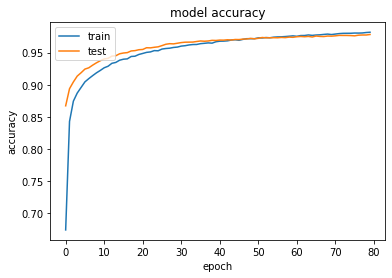

In [12]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

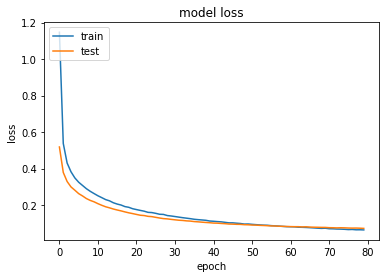

In [13]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
def prep(img):
  imgp = img[:, :, 0]
  imgp = imgp.reshape(1, (28*28))
  imgp = imgp.astype('float32')
  imgp = (imgp/255)-0.5 
  return imgp

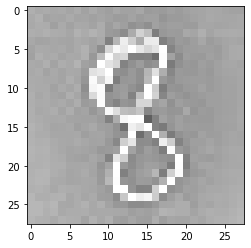

In [16]:
img = mpimg.imread('img.jpg')
imgplot = plt.imshow(img)

In [22]:
img = prep(img)
ypred = model.predict_classes(img)

In [23]:
print(ypred)

[8]


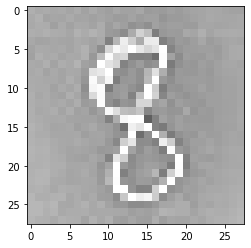

In [24]:
img2 = mpimg.imread('img2.jpg')
imgplot = plt.imshow(img2)
img2 = prep(img2)

In [25]:
ypred = model.predict_classes(img2)
print(ypred)

[8]


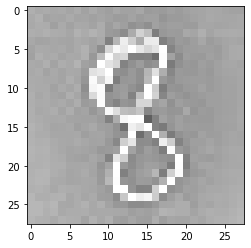

In [26]:
img3 = mpimg.imread('img3.jpg')
imgplot = plt.imshow(img3)
img3 = prep(img3)

In [27]:
ypred = model.predict_classes(img3)
print(ypred)

[8]
